### Importing needed packages

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Reading data

In [2]:
df = pd.read_csv('Clustering_project.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Chacking for missing values

In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Choosing the Annual Income & Spending Score column for clustering

In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

### Choosing the best value for number of clustering

WCSS: Within Clusters Sum of Squares

In [25]:
wcss = []

for k in range(1, 11):
    
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)


### Elbow plot

Text(0, 0.5, 'Wcss')

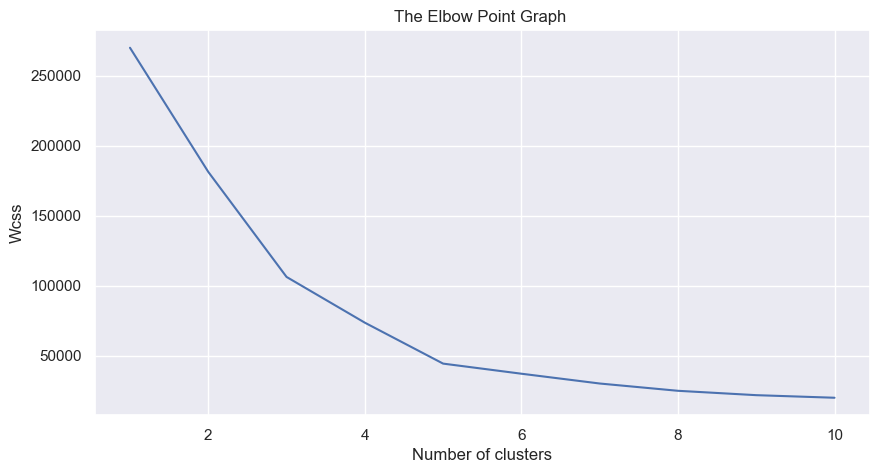

In [23]:
sns.set()
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Point Graph ")
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')



#### The best value for the number of clustering according to the diagram above is 5 

In [62]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

#### set label for  each data point based on their cluster

In [61]:
Y = kmeans.fit_predict(X)

### Visualizing all the clusters

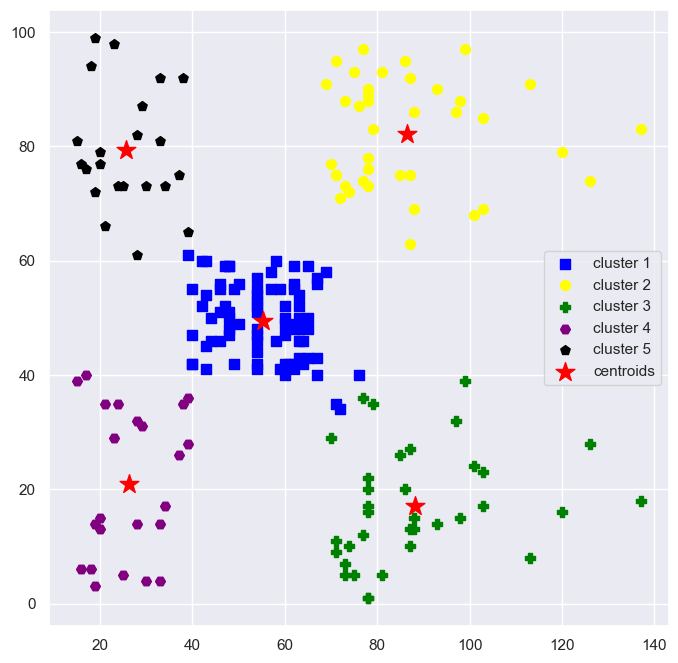

In [60]:
plt.figure(figsize=(8, 8))

plt.scatter(
    X[Y==0,0], X[Y==0,1],
    s=50 ,c='blue',
    marker='s', label='cluster 1'
)
plt.scatter(
    X[Y==1,0], X[Y==1,1],
    s=50 ,c='yellow',
    marker='o', label='cluster 2'
)
plt.scatter(
    X[Y==2,0], X[Y==2,1],
    s=50 ,c='green',
    marker='P', label='cluster 3'
)
plt.scatter(
    X[Y==3,0], X[Y==3,1],
    s=50 ,c='purple',
    marker='H', label='cluster 4'
)
plt.scatter(
    X[Y==4,0], X[Y==4,1],
    s=50 ,c='black',
    marker='p', label='cluster 5'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c = 'red',
    marker='*', label='centroids')

plt.legend(scatterpoints=1)